In [64]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.signal as signal
from functools import wraps

In [65]:


def señal(func):
    """
    Decorador que valida los parámetros para la generación de señales y genera el vector de tiempo.
    Verifica que el número de muestras (nn) sea mayor que 0 y que la frecuencia de muestreo (fs) sea positiva.
    También genera y pasa el vector de tiempo (tt) a la función decorada.
    """
    @wraps(func)
    def wrapper(vmax: float, dc: float, ff: float, ph: float, nn: int, fs: float):
        # Validación de parámetros
        if nn <= 0:
            raise ValueError("El número de muestras 'nn' debe ser mayor que 0.")
        if fs <= 0:
            raise ValueError("La frecuencia de muestreo 'fs' debe ser mayor que 0.")
        
        # Generación del vector de tiempo
        ts = 1 / fs
        tt = np.linspace(0, (nn-1)*ts, nn).flatten()
        
        # Llamada a la función decorada con el vector de tiempo ya generado
        return func(vmax, dc, ff, ph, nn, fs, tt)
    
    return wrapper

@señal
def mi_funcion_sen(vmax: float, dc: float, ff: float, ph: float, nn: int, fs: float, tt: np.ndarray):
    """
    Genera una señal senoidal.

    Parámetros:
    - vmax: Amplitud pico de la señal senoidal.
    - dc: Valor de continua (desplazamiento en el eje Y).
    - ff: Frecuencia de la señal senoidal (Hz).
    - ph: Fase inicial de la señal (radianes).
    - nn: Número de muestras a generar (debe ser un número positivo).
    - fs: Frecuencia de muestreo (Hz).
    - tt: Vector de tiempo generado por el decorador.

    Retorno:
    - tt: Vector de tiempo.
    - xx: Vector de amplitud de la señal.
    """
    xx = dc + vmax * np.sin(2 * np.pi * ff * tt + ph)
    return tt, xx

@señal
def mi_funcion_cos(vmax: float, dc: float, ff: float, ph: float, nn: int, fs: float, tt: np.ndarray):
    """
    Genera una señal cosenoidal.

    Parámetros:
    - vmax: Amplitud pico de la señal senoidal.
    - dc: Valor de continua (desplazamiento en el eje Y).
    - ff: Frecuencia de la señal senoidal (Hz).
    - ph: Fase inicial de la señal (radianes).
    - nn: Número de muestras a generar (debe ser un número positivo).
    - fs: Frecuencia de muestreo (Hz).
    - tt: Vector de tiempo generado por el decorador.

    Retorno:
    - tt: Vector de tiempo.
    - xx: Vector de amplitud de la señal.
    """
    xx = dc + vmax * np.cos(2 * np.pi * ff * tt + ph)
    return tt, xx

@señal
def mi_funcion_triangular(vmax: float, dc: float, ff: float, ph: float, nn: int, fs: float, tt: np.ndarray):
    """
    Genera una señal triangular.

    Parámetros:
    - vmax: Amplitud pico de la señal senoidal.
    - dc: Valor de continua (desplazamiento en el eje Y).
    - ff: Frecuencia de la señal senoidal (Hz).
    - ph: Fase inicial de la señal (radianes).
    - nn: Número de muestras a generar (debe ser un número positivo).
    - fs: Frecuencia de muestreo (Hz).
    - tt: Vector de tiempo generado por el decorador.

    Retorno:
    - tt: Vector de tiempo.
    - xx: Vector de amplitud de la señal.
    """
    xx = dc + vmax * signal.sawtooth(2 * np.pi * ff * tt + ph, 0.5)
    return tt, xx

@señal
def mi_funcion_cuadrada(vmax: float, dc: float, ff: float, ph: float, nn: int, fs: float, tt: np.ndarray):
    """
    Genera una señal cuadrada.

    Parámetros:
    - vmax: Amplitud pico de la señal senoidal.
    - dc: Valor de continua (desplazamiento en el eje Y).
    - ff: Frecuencia de la señal senoidal (Hz).
    - ph: Fase inicial de la señal (radianes).
    - nn: Número de muestras a generar (debe ser un número positivo).
    - fs: Frecuencia de muestreo (Hz).
    - tt: Vector de tiempo generado por el decorador.

    Retorno:
    - tt: Vector de tiempo.
    - xx: Vector de amplitud de la señal.
    """
    xx = dc + vmax * signal.square(2 * np.pi * ff * tt + ph)
    return tt, xx

@señal
def mi_funcion_diente_de_sierra(vmax: float, dc: float, ff: float, ph: float, nn: int, fs: float, tt: np.ndarray):
    """
    Genera una señal de diente de sierra.

    Parámetros:
    - vmax: Amplitud pico de la señal senoidal.
    - dc: Valor de continua (desplazamiento en el eje Y).
    - ff: Frecuencia de la señal senoidal (Hz).
    - ph: Fase inicial de la señal (radianes).
    - nn: Número de muestras a generar (debe ser un número positivo).
    - fs: Frecuencia de muestreo (Hz).
    - tt: Vector de tiempo generado por el decorador.

    Retorno:
    - tt: Vector de tiempo.
    - xx: Vector de amplitud de la señal.
    """
    xx = dc + vmax * signal.sawtooth(2 * np.pi * ff * tt + ph)
    return tt, xx


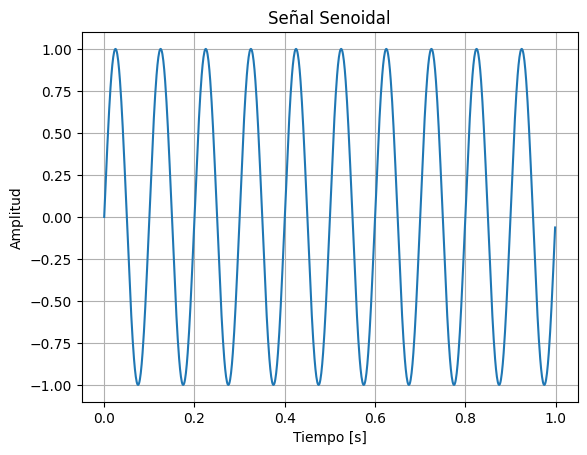

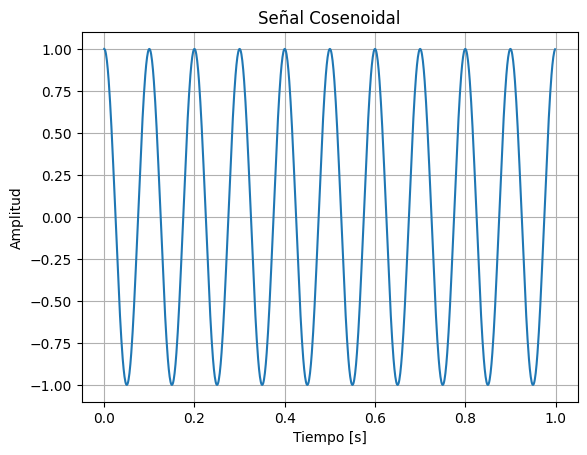

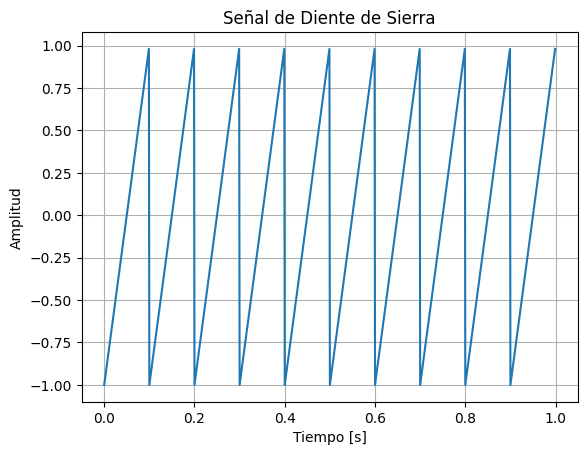

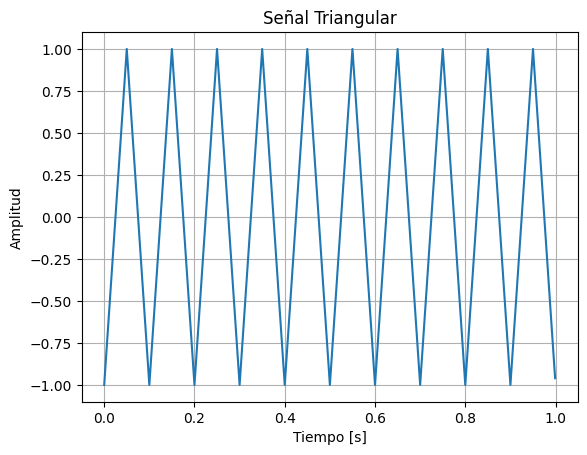

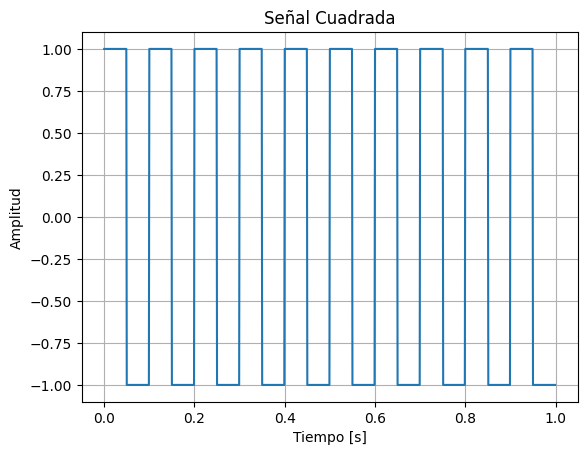

In [68]:
import matplotlib.pyplot as plt

# Señales generadas previamente
tt, sin = mi_funcion_sen(vmax=1, dc=0, ff=10, ph=0, nn=1000, fs=1000)
tt, cos = mi_funcion_cos(vmax=1, dc=0, ff=10, ph=0, nn=1000, fs=1000)
tt, sierra = mi_funcion_diente_de_sierra(vmax=1, dc=0, ff=10, ph=0, nn=1000, fs=1000)
tt, triangular = mi_funcion_triangular(vmax=1, dc=0, ff=10, ph=0, nn=1000, fs=1000)
tt, cuadrada = mi_funcion_cuadrada(vmax=1, dc=0, ff=10, ph=0, nn=1000, fs=1000)


plt.figure()
plt.plot(tt, sin)
plt.title('Señal Senoidal')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud')
plt.grid(True)

plt.figure()
plt.plot(tt, cos)
plt.title('Señal Cosenoidal')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud')
plt.grid(True)

plt.figure()
plt.plot(tt, sierra)
plt.title('Señal de Diente de Sierra')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud')
plt.grid(True)

plt.figure()
plt.plot(tt, triangular)
plt.title('Señal Triangular')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud')
plt.grid(True)

plt.figure()
plt.plot(tt, cuadrada)
plt.title('Señal Cuadrada')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud')
plt.grid(True)

plt.show()
